In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno # https://github.com/ResidentMario/missingno


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
dat = (pd.read_csv("country_data.csv")
       .eval("ln_pop = log(pop)")
       .eval("ln_gdppc = log(gdppc)")
       .drop(columns=['gdppc','pop'])
       )

dat.head()

,country,ccode,year,polity,continent,regime_type,infant_mort,life_exp,life_exp_female,life_exp_male,ln_pop,ln_gdppc
0,Afghanistan,700,1800.0,-6.0,Asia,authoritarian,NaN,NaN,NaN,NaN,16.565709,5.353169
1,Afghanistan,700,1801.0,-6.0,Asia,authoritarian,NaN,NaN,NaN,NaN,16.565709,5.353169
2,Afghanistan,700,1802.0,-6.0,Asia,authoritarian,NaN,NaN,NaN,NaN,16.565709,5.353169
3,Afghanistan,700,1803.0,-6.0,Asia,authoritarian,NaN,NaN,NaN,NaN,16.565709,5.353169
4,Afghanistan,700,1804.0,-6.0,Asia,authoritarian,NaN,NaN,NaN,NaN,16.565709,5.353169


Common questions to ask as we learn our data:

    What is the unit of observation?
        Is the data tidy?
        What does each row signify?
        Does the unit of observation map to your unit of analysis?
    What is the coverage of the data?
        Time (year, months, days)
        Space (countries, subnational units like states, census tracks, point locations)
        Groups (relevant populations)
    Who put the data together?
        Why was the data created and for what purpose?
        Potential source of bias? (e.g. does everyone on the research team come from the same background?)
    How was the data generated?
        Human vs. Machine
        Coding procedures
    Is the data complete?
        Extent of missingness globally
        Extend of missingness by subgroup

Remember you’re almost always “borrowing” data, commandeering it to fit a purpose it wasn’t entirely built for, so we must always be wary of our data. We must investigate it, vet it, make sure it’s a good fit for our analytic needs.


## Numerical Summarization Techniques

In [4]:
# Dimensionality of the data
dat.shape

(13855, 12)

In [5]:
# Data types of each of the variables
dat.dtypes

# note the generic object category, but these are our strings, but we can convert them into specific classes
# to our benefit

country             object
ccode                int64
year               float64
polity             float64
continent           object
regime_type         object
infant_mort        float64
life_exp           float64
life_exp_female    float64
life_exp_male      float64
ln_pop             float64
ln_gdppc           float64
dtype: object

In [6]:
# Convert data to the appropriate type
dat.year = dat.year.astype("int")
dat.ccode = dat.ccode.astype("int")
dat.country = dat.country.astype("category")
dat.continent = dat.continent.astype("category")
dat.regime_type = dat.regime_type.astype("category")

# Categorical variables are similar to factor variables in R
dat.continent.unique()

# Look at the type again.
dat.dtypes

country            category
ccode                 int64
year                  int64
polity              float64
continent          category
regime_type        category
infant_mort         float64
life_exp            float64
life_exp_female     float64
life_exp_male       float64
ln_pop              float64
ln_gdppc            float64
dtype: object

In [8]:
# Numerical summaries of each numeric variable
dat.describe()

# Can rotate and round
dat.describe(include="float").round(1).T

,count,mean,std,min,25%,50%,75%,max
polity,13855.0,-0.2,7.0,-10.0,-6.0,-2.0,7.0,10.0
infant_mort,6217.0,58.0,48.7,1.6,15.7,45.6,92.5,236.5
life_exp,6485.0,62.7,12.2,18.9,52.9,65.0,72.9,84.0
life_exp_female,6485.0,64.9,12.8,22.4,54.4,67.2,75.7,87.1
life_exp_male,6485.0,60.6,11.7,16.3,51.2,62.9,70.2,81.7
ln_pop,13855.0,16.4,1.4,12.3,15.4,16.1,17.3,21.0
ln_gdppc,13855.0,7.7,1.5,3.6,6.5,7.6,9.0,11.5


In [9]:
# How correlated are the continous variables with one another?
# We can see this easily with a correlation matrix.
dat.select_dtypes(include=['float64']).corr()

,polity,infant_mort,life_exp,life_exp_female,life_exp_male,ln_pop,ln_gdppc
polity,1.000000,-0.548953,0.534048,0.545773,0.517335,0.040068,0.352810
infant_mort,-0.548953,1.000000,-0.942641,-0.946033,-0.934320,-0.156958,-0.801497
life_exp,0.534048,-0.942641,1.000000,0.997651,0.997400,0.208528,0.831498
life_exp_female,0.545773,-0.946033,0.997651,1.000000,0.990193,0.206487,0.832973
life_exp_male,0.517335,-0.934320,0.997400,0.990193,1.000000,0.209790,0.826782
ln_pop,0.040068,-0.156958,0.208528,0.206487,0.209790,1.000000,0.106091
ln_gdppc,0.352810,-0.801497,0.831498,0.832973,0.826782,0.106091,1.000000


In [13]:
# Categorical summaries of each Categorical variavle
dat.describe(include="category").T
# the T is to tranpose the features into rows and the features as columns

,count,unique,top,freq
country,13855,122,Afghanistan,217
continent,13855,5,Americas,4033
regime_type,13855,3,competitive authoritarian,5063


In [14]:
# Breakdown of the different categories
dat.continent.value_counts()

Americas    4033
Europe      3921
Africa      2880
Asia        2745
Oceania      276
Name: continent, dtype: int64

In [15]:
dat.regime_type.value_counts()

competitive authoritarian    5063
authoritarian                4618
democracy                    4174
Name: regime_type, dtype: int64

In [16]:
dat.country.value_counts(ascending=True)

Montenegro         9
Eritrea           24
Croatia           26
Slovenia          26
Namibia           27
                ... 
United States    217
Iran             217
Japan            217
Spain            217
Afghanistan      217
Name: country, Length: 122, dtype: int64

"A boring EDA session is a good thing, because it means your data is working as expected. More often than not, if something has a strange relationship, it's more likely due to something being wrong with your data."

In [17]:
# FRUSTRATED by the limited print options? Change the default behavior.
pd.options.display.max_rows = 500
dat.country.value_counts(ascending=True)

Montenegro                    9
Eritrea                      24
Croatia                      26
Slovenia                     26
Namibia                      27
Djibouti                     40
Angola                       42
Mozambique                   42
Comoros                      42
Guinea-Bissau                43
Bangladesh                   45
Pakistan                     45
Bahrain                      46
Zimbabwe                     47
Equatorial Guinea            49
Mauritius                    49
Swaziland                    49
Botswana                     51
Lesotho                      51
Gambia                       52
Zambia                       53
Malawi                       53
Kuwait                       54
Kenya                        54
Uganda                       55
Algeria                      55
Burundi                      55
Tanzania                     56
Sierra Leone                 56
Sudan                        56
Rwanda                       56
Somalia 

In [18]:
# Crosstabs: look at differences across categorical data.
pd.crosstab(dat.regime_type,dat.continent,margins=True)

continent,Africa,Americas,Asia,Europe,Oceania,All
regime_type,,,,,,
authoritarian,1367,689,1557,1005,0,4618
competitive authoritarian,1041,2199,761,1061,1,5063
democracy,472,1145,427,1855,275,4174
All,2880,4033,2745,3921,276,13855


If you don't see your relationship between two categorical variables the way you expect, then you likely haven't found what you think you have.

In [20]:
# Cross tabs represented as proportions
# applying the lambda function in which x takes the value for each column, so we divide the value by the sum
pd.crosstab(dat.regime_type,dat.continent).apply(lambda x: x/x.sum(), axis=1).round(3) # By Row



continent,Africa,Americas,Asia,Europe,Oceania
regime_type,,,,,
authoritarian,0.296,0.149,0.337,0.218,0.000
competitive authoritarian,0.206,0.434,0.150,0.210,0.000
democracy,0.113,0.274,0.102,0.444,0.066


In [21]:

pd.crosstab(dat.regime_type,dat.continent).apply(lambda x: x/x.sum(), axis=0).round(3) # By Column


continent,Africa,Americas,Asia,Europe,Oceania
regime_type,,,,,
authoritarian,0.475,0.171,0.567,0.256,0.000
competitive authoritarian,0.361,0.545,0.277,0.271,0.004
democracy,0.164,0.284,0.156,0.473,0.996


In [22]:
# Categorical by Continuous Data: use groupby and numerical summaries
dat.groupby(['continent'])['ln_gdppc'].mean().sort_values(ascending=False)


continent
Oceania     9.285921
Europe      9.077467
Americas    7.535699
Asia        7.137950
Africa      6.228215
Name: ln_gdppc, dtype: float64

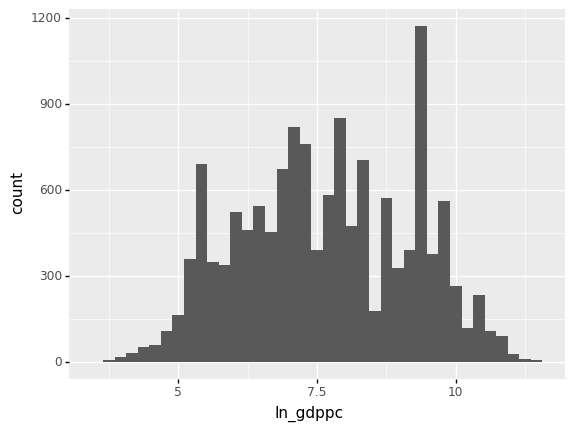

<ggplot: (8782471332024)>

In [23]:
# Visualizing Distributions

(
    ggplot(dat,aes(x="ln_gdppc")) +
    geom_histogram()
)


In [24]:
# Need to first alter
d = dat.select_dtypes(include="float").melt()
d.head()

,variable,value
0,polity,-6.0
1,polity,-6.0
2,polity,-6.0
3,polity,-6.0
4,polity,-6.0


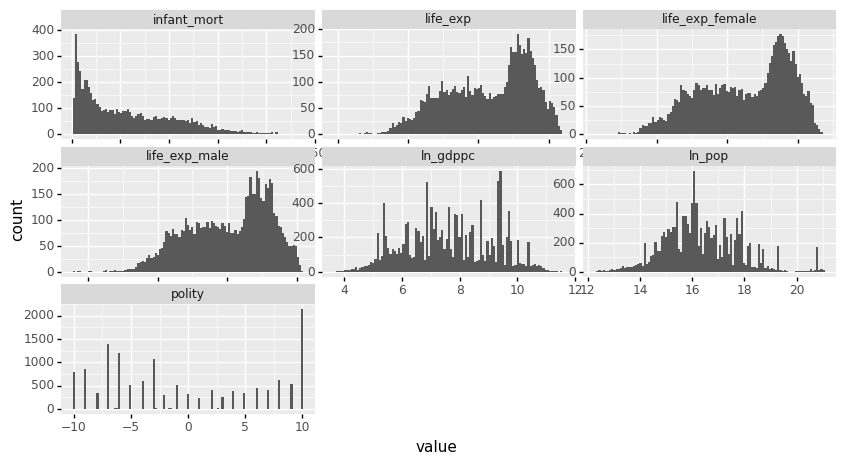

<ggplot: (8782471209994)>

In [25]:
(
    ggplot(d.dropna(),aes(x="value")) +
    geom_histogram() +
    # scales=free allows the facets graphs to be on the scale they are in the data, rather than on one 
    facet_wrap("variable",scales="free") +
    theme(figure_size=(10,5))
)

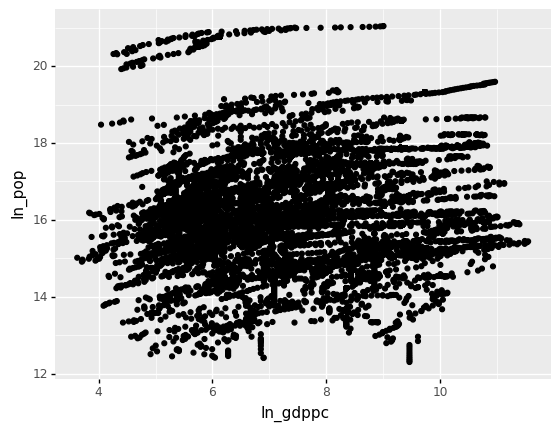

<ggplot: (8782474634259)>

In [32]:
# visualizing correlations, limited, but can be helpful, more efficient to use machine learning tools that we'll explore later
(
    ggplot(dat,aes(x = "ln_gdppc",y='ln_pop')) +
    geom_point()
)

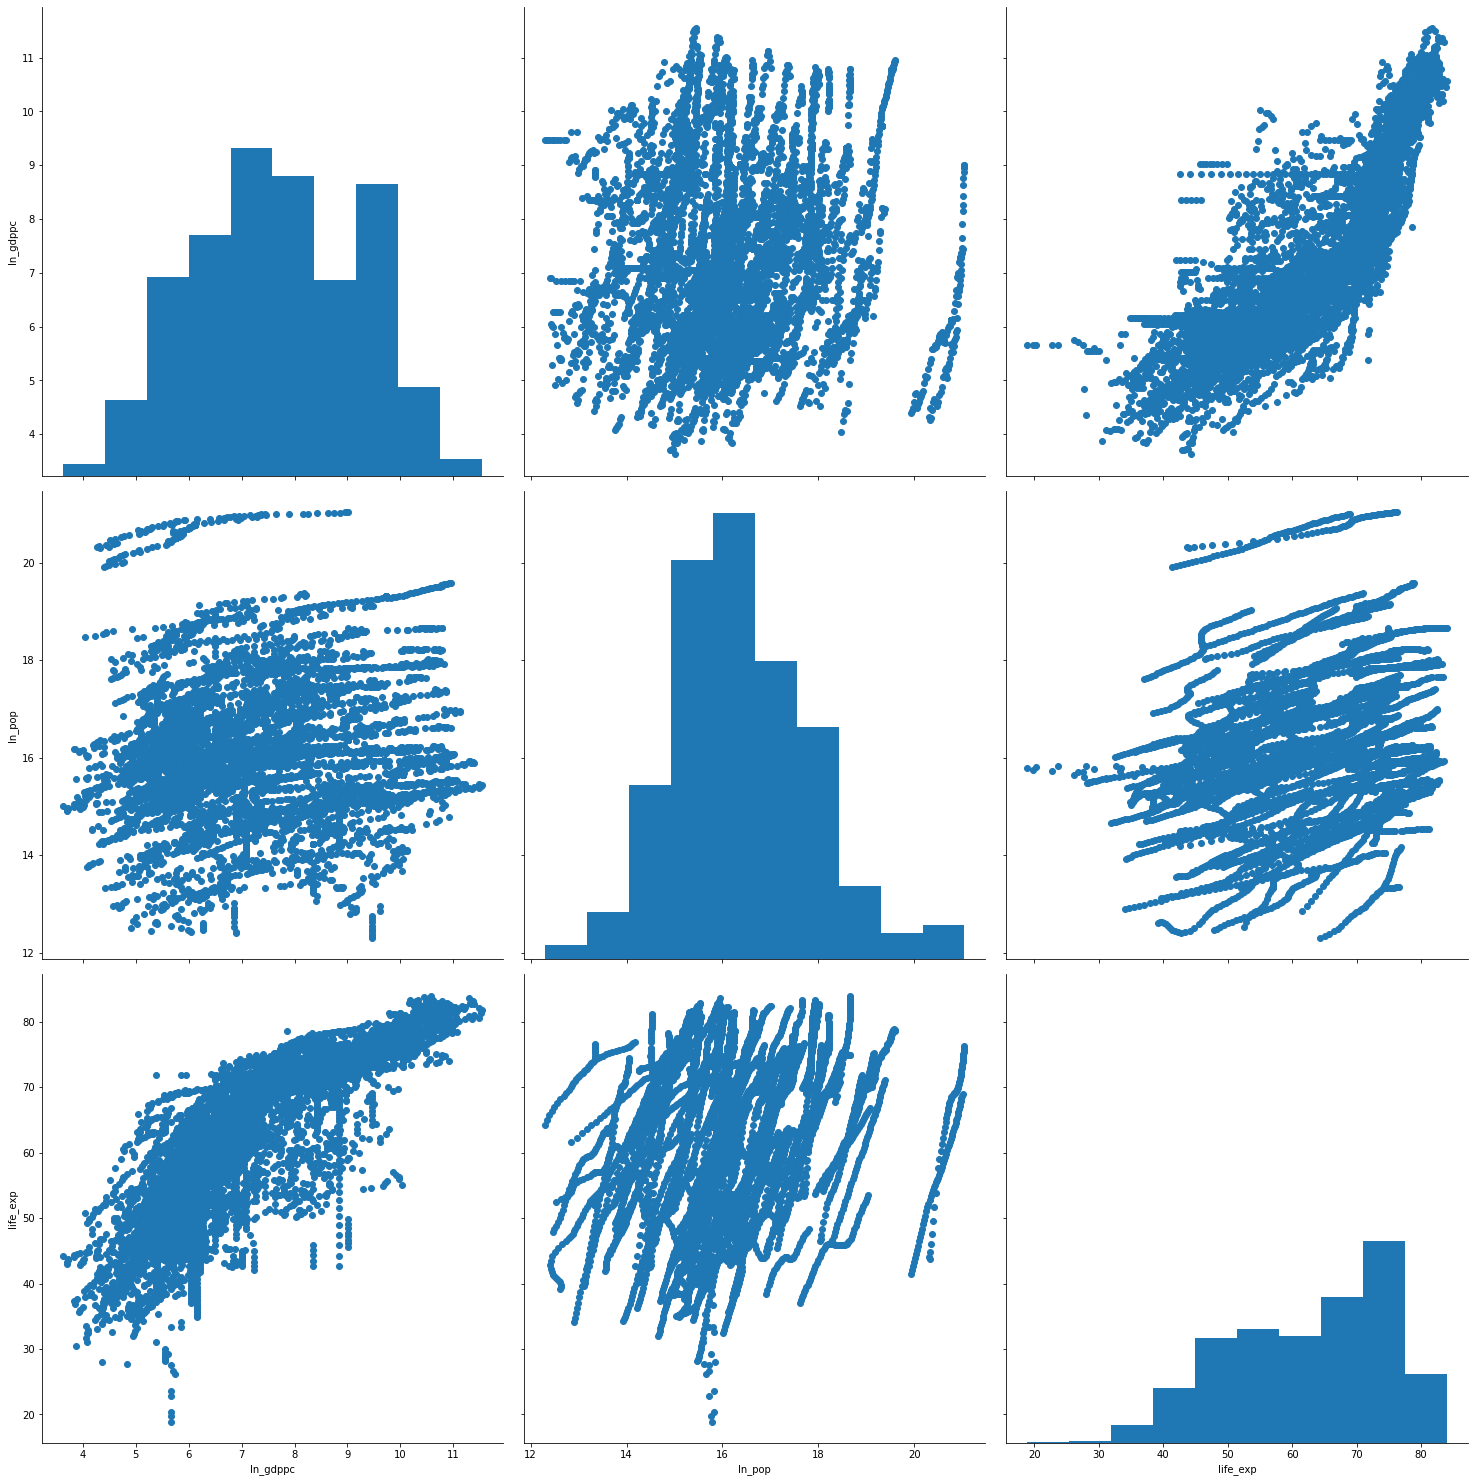

In [27]:
# Visualizing many corrlations with a pairs scatter plot

# filter to only three variables
d = dat.filter(["ln_gdppc","ln_pop","life_exp"])

# seaborn builds a grid and then we set what type of grid should be on the diagonal (one column) and the offdiag (where they intersect with another column)
g = sns.PairGrid(d,height=7)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

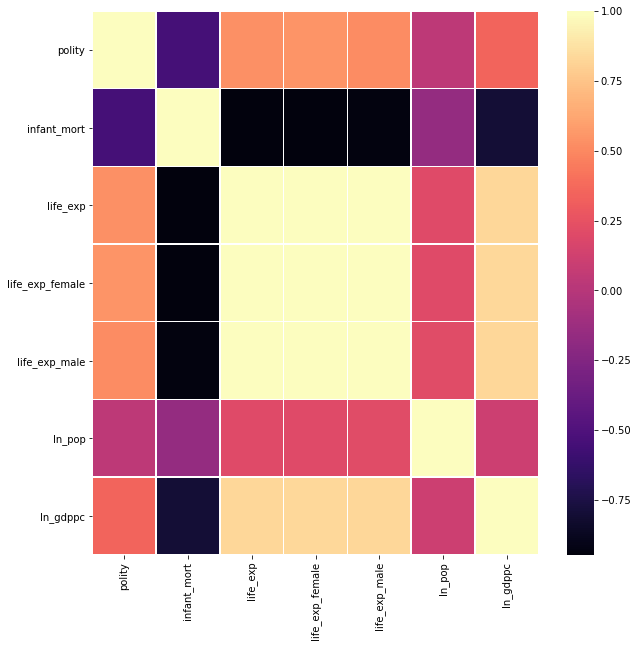

In [28]:
# Visualizing correlations as a heatmap
M = dat.select_dtypes(include=['float64']).corr()


plt.figure(figsize = (10,10))
sns.heatmap(M,center=0,linewidths=.5,cmap="magma")
plt.show()


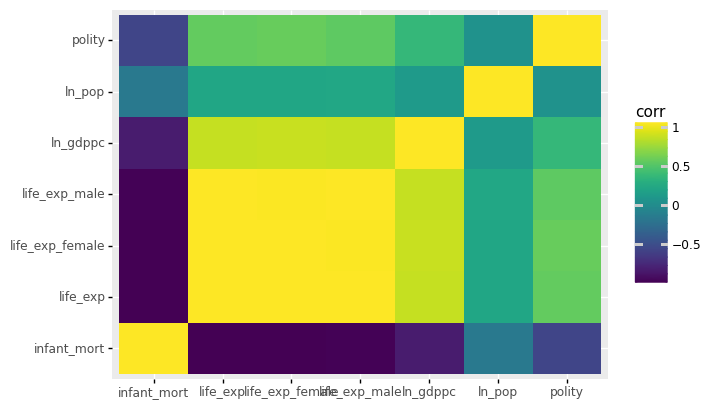

<ggplot: (8782472325190)>

In [29]:
# In plotnine
# whereas seaborn has a heatmap function, we create a correlation matrix, unstack it, add a new variable name,
# and then plot with the long data format based on the newly created features and the tile plot
M = dat.select_dtypes(include=['float64']).corr()
M2 = M.unstack().reset_index().add_prefix('var')
M2.head()


(
    ggplot(M2,aes(x="varlevel_1",y="varlevel_0",fill="var0")) +
    geom_tile() +
    labs(x="",y="",fill="corr")
)

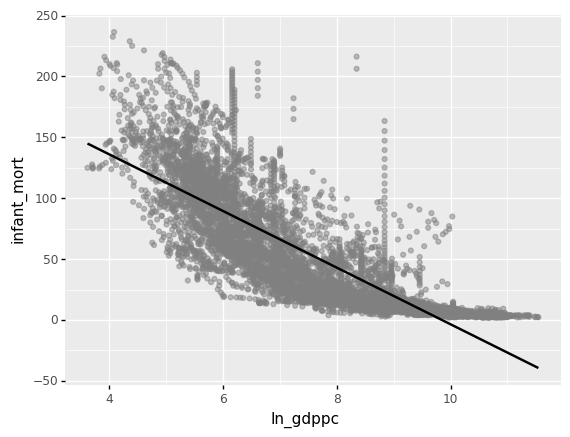

<ggplot: (8782474779636)>

In [30]:
# Fit a linear trend

(
    ggplot(dat,aes(x = "ln_gdppc",y='infant_mort')) +
    geom_point(color="grey",alpha=.5) +
    geom_smooth(method="lm",se=False)
)

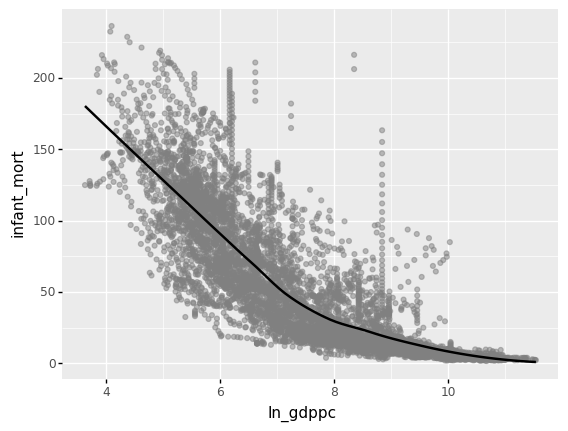

<ggplot: (8782441944140)>

In [37]:
# Fit a loess (local regression)
(
    ggplot(dat,aes(x = "ln_gdppc",y='infant_mort')) +
    geom_point(color="grey",alpha=.5) +
    geom_smooth(method="loess",se=False)
)

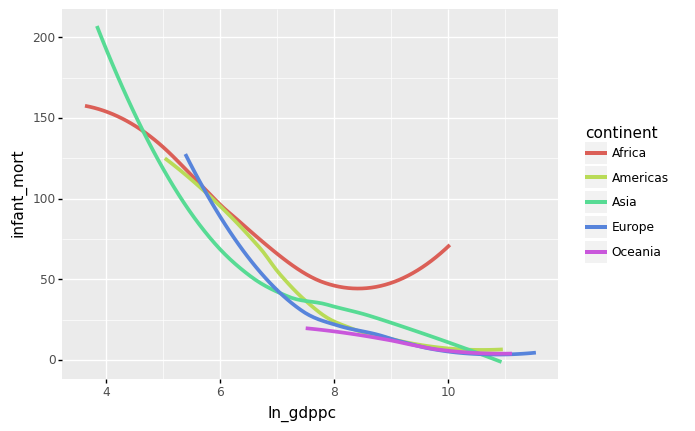

<ggplot: (8782442657910)>

In [38]:
# Group and break up the trends
(
    ggplot(dat,aes(x = "ln_gdppc",y='infant_mort',color="continent")) +
    # geom_point(alpha=.5) +
    geom_smooth(method="loess",se=False,size=1.5)
)

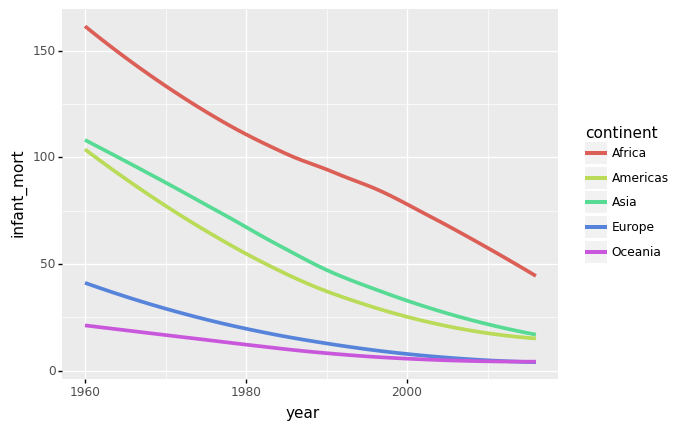

<ggplot: (8782441944866)>

In [39]:
# Examine Trends Over time

(
  ggplot(dat,aes(x = "year",y='infant_mort',color="continent")) +
  geom_smooth(method="loess",se=False,size=1.5)
)


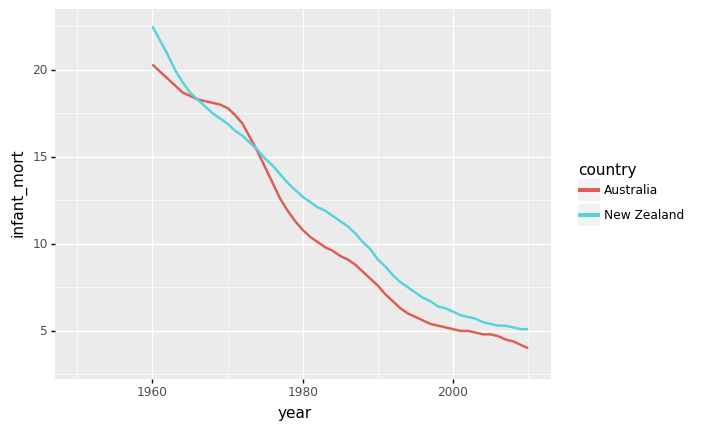

<ggplot: (8782441945814)>

In [35]:
# Examine trends for specific countries.

# Break up by country
d = dat.query("continent == 'Oceania'")
d.country = d.country.astype("str") # Turn off the categorical var

(
  ggplot(d,aes(x = "year",y='infant_mort',color="country")) +
  geom_path(size=1) +
  xlim(1950,2010)
)

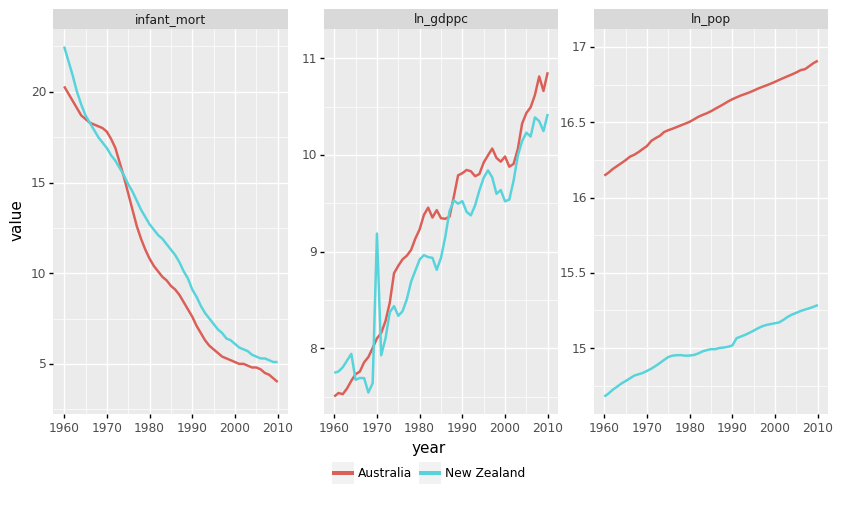

<ggplot: (8782475291495)>

In [36]:
# Examine trends across multiple variables
d = dat.query("continent == 'Oceania'")
d.country = d.country.astype("str") # Turn off the categorical var
d2 = (d
      .filter(['country','year','infant_mort',"ln_gdppc","ln_pop"])
      .melt(id_vars=["country","year"])
      )

# Generate Plot
(
    ggplot(d2,aes("year","value",color="country")) +
    geom_path(size=1) +
    facet_wrap("variable",scales="free_y") +
    #keeping X locked to one scale across all of them, but y is free as above
    xlim(1960,2010) +
    labs(color="") +
    theme(legend_position="bottom",
          figure_size = (10,5),
          subplots_adjust={'wspace':0.15})
    #wspace adjusts the width between for reading more easily
)

In [44]:
# Detecting missing data

# Missing data by row
# dat.isna() is a table of boolean values, so sum up the 1,0 values (axis=1 is row)
dat.isna().sum(axis=1)

# Missing data by column
dat.isna().sum(axis=0)

country               0
ccode                 0
year                  0
polity                0
continent             0
regime_type           0
infant_mort        7638
life_exp           7370
life_exp_female    7370
life_exp_male      7370
ln_pop                0
ln_gdppc              0
dtype: int64

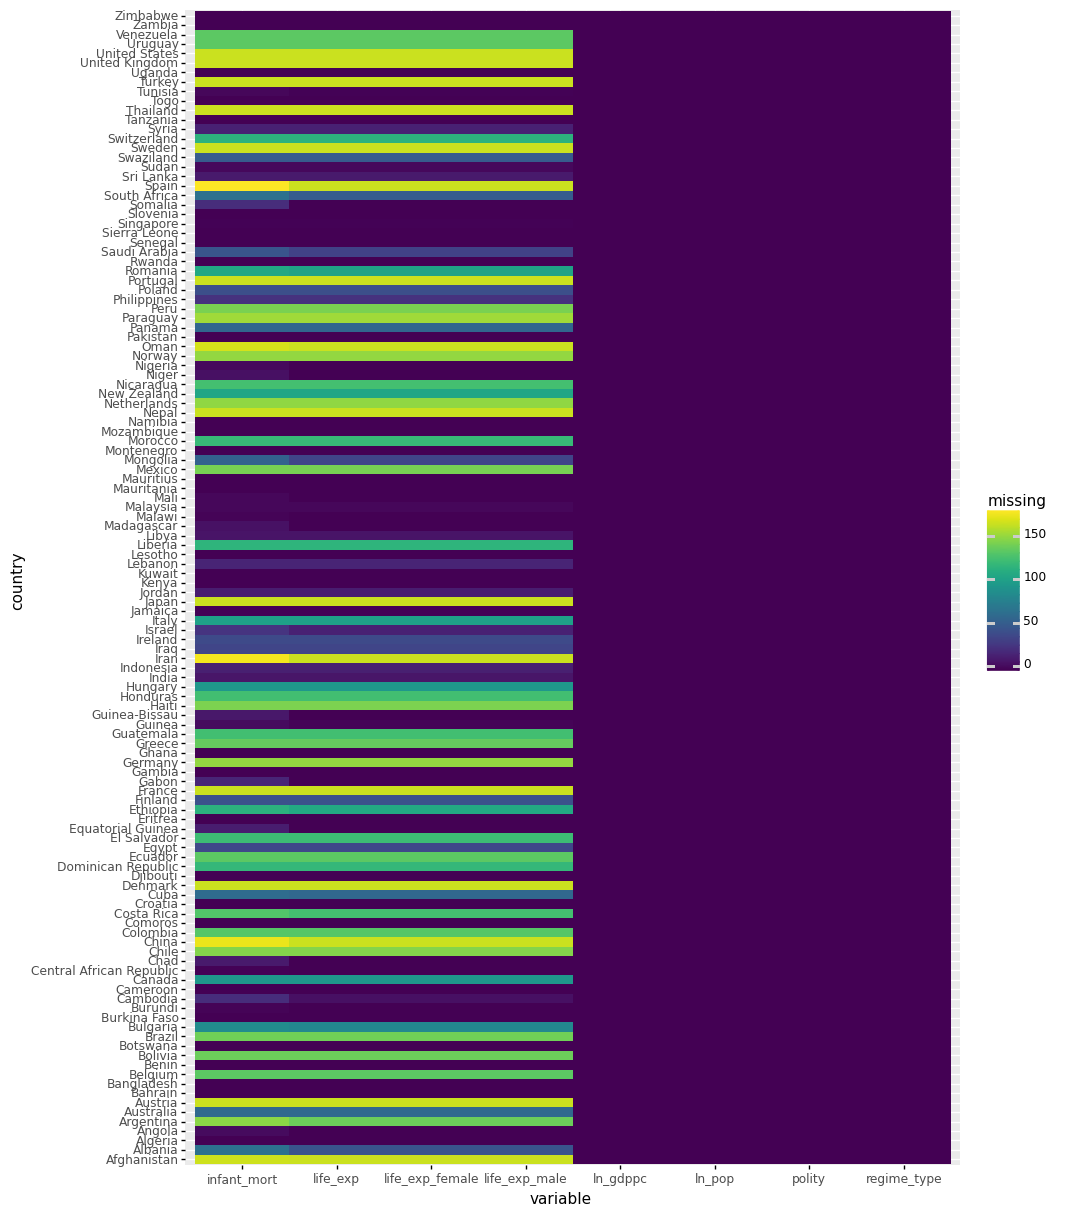

<ggplot: (8782443140190)>

In [41]:
d = dat.melt(id_vars=["country",'year',"continent",'ccode'])
d = d.assign(missing = 1*d.value.isna())
d = d.groupby(['country','variable']).missing.sum().reset_index()


(
 ggplot(d,aes(x="variable",y="country",fill="missing")) +
 geom_tile() +
 theme(figure_size = (10,15))
)

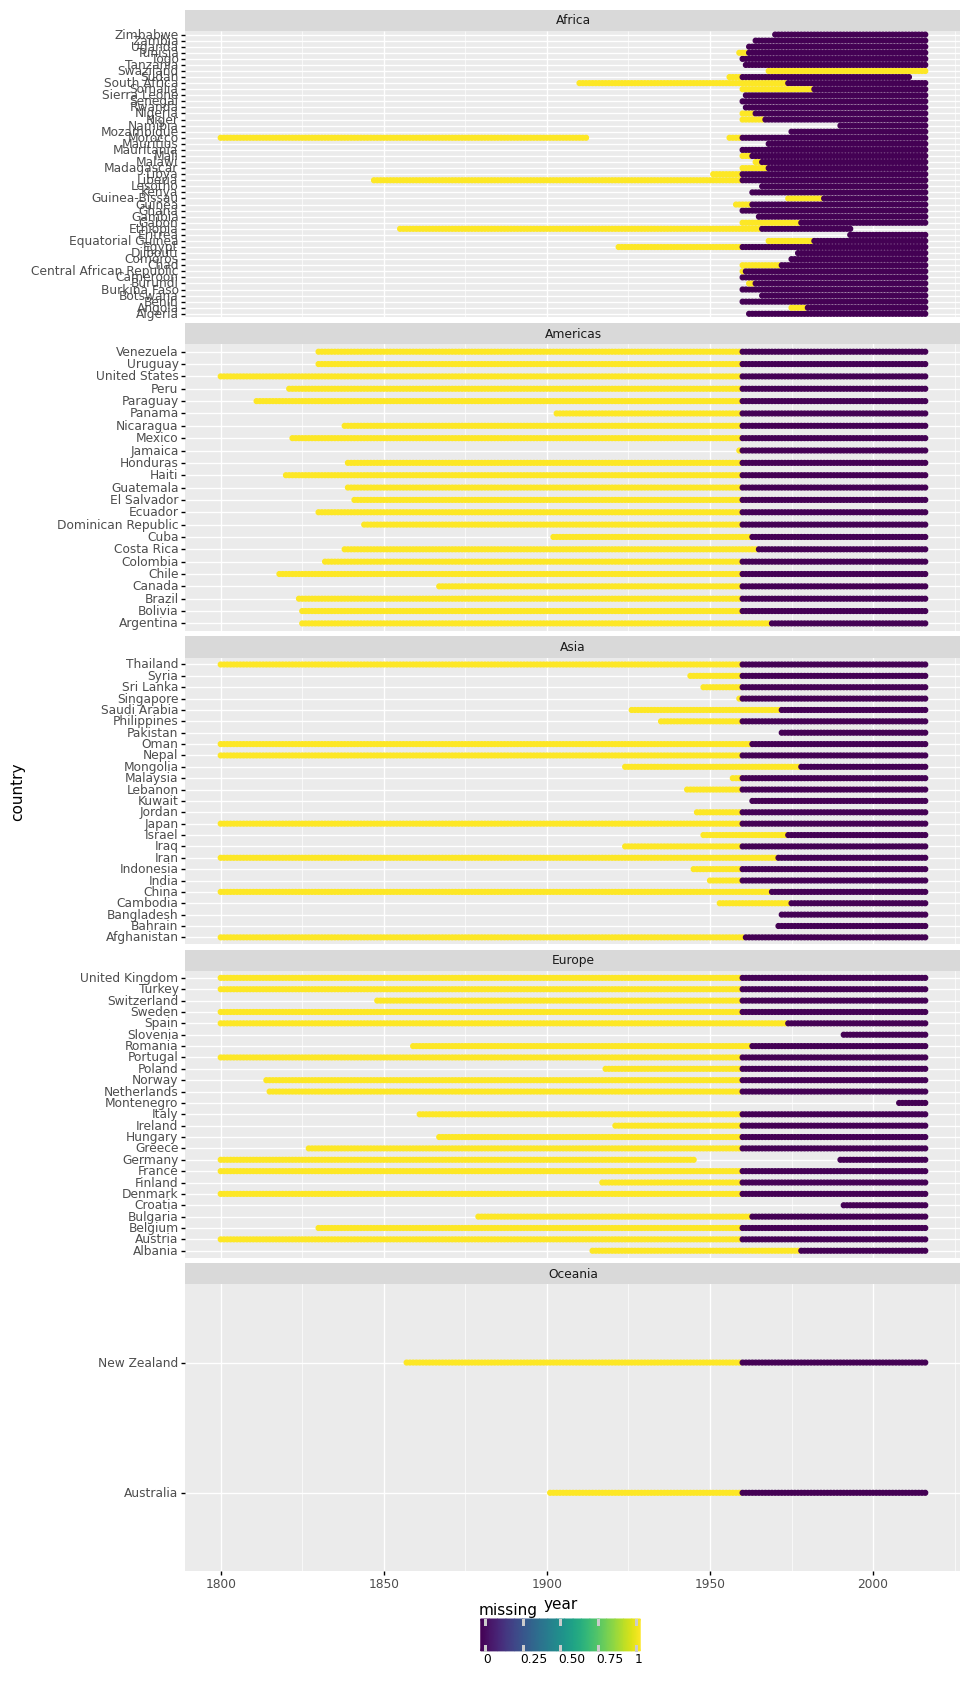

<ggplot: (8782444007126)>

In [42]:
# Visualizing Missing Data for a specfic variable
# Similar to above, but over time

d = dat.assign(missing = 1*dat.infant_mort.isna())

(
 ggplot(d,aes(x="year",y="country",color="missing")) +
 geom_point() +
 facet_wrap("continent",scales="free_y",ncol=1) +
 theme(legend_position="bottom",
       figure_size = (10,20))
)


In [43]:
# Using missingno to assess missingnees.

#msno.matrix(dat)
#msno.bar(dat)
#msno.heatmap(dat)

In [47]:
dd =  dat.sample(10,random_state=123)

# Easiest solution, drop all missing values (listwise deletion)
dd.shape
dd.dropna().shape

(7, 12)

In [48]:
# zoom in on the missing entries
dd.infant_mort.isna()

# Fill values with some value like a 0
dd.infant_mort.fillna(0)

5835      38.8
11301     28.2
12         0.0
11108      0.0
439        0.0
10883     56.2
1273      89.4
4672     119.3
3138      19.3
7392      77.5
Name: infant_mort, dtype: float64

In [49]:
# fill NA values with the column mean
dd.infant_mort.fillna(dd.infant_mort.mean())

# fill NA with the column mean
dd.life_exp.fillna(dd.life_exp.median())

5835     69.822439
11301    66.910220
12       60.353000
11108    60.353000
439      60.353000
10883    60.353000
1273     50.893000
4672     49.625000
3138     74.429000
7392     55.782000
Name: life_exp, dtype: float64

In [50]:
# for categorical data, fill in data with the most common case.
ee = pd.DataFrame(dict(cat = ["A","A","B",np.nan,"C"],id = [1,2,3,4,5]))
ee
ee.apply(lambda x: x.fillna(x.value_counts().index[0]))

,cat,id
0,A,1
1,A,2
2,B,3
3,A,4
4,C,5
